In [1]:
import geopandas as gpd

file = gpd.read_file('h3.geojson')
file

,index,hex_id,latitude,longitude,altitude,population,osmnx,elevation,landcover,NDVI,...,population_max,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,geometry
0,871f91d93ffffff,871f91d93ffffff,45.989310,4.850769,0,87.457157,1.861977e-01,264.522645,1.568831,0.586644,...,272.0,0.000000,0.086438,0.044913,0.0,0.713210,0.009284,0.141388,0.004767,"POLYGON ((4.83447 45.99325, 4.83653 45.98116, ..."
1,871f91c58ffffff,871f91c58ffffff,46.055726,5.340705,0,224.127681,3.694198e-01,262.263716,1.206984,0.582386,...,468.0,0.042269,0.230299,0.074564,0.0,0.292768,0.016708,0.343392,0.000000,"POLYGON ((5.32436 46.05974, 5.32636 46.04762, ..."
2,871f91d35ffffff,871f91d35ffffff,46.219423,4.905380,0,63.617147,6.188525e-02,206.253934,1.643165,0.566968,...,242.0,0.000000,0.114944,0.055898,0.0,0.689538,0.007050,0.132570,0.000000,"POLYGON ((4.88902 46.22335, 4.89109 46.21128, ..."
3,871f91719ffffff,871f91719ffffff,45.719268,5.755522,0,59.061651,2.816948e-08,328.426612,1.359975,0.749924,...,204.0,0.039556,0.344896,0.161114,0.0,0.162179,0.143466,0.148791,0.000000,"POLYGON ((5.73922 45.72338, 5.74115 45.71119, ..."
4,871f95600ffffff,871f95600ffffff,46.444826,4.929589,0,181.453670,4.262387e-01,175.686507,1.691321,0.603043,...,718.0,0.009253,0.131049,0.290859,0.0,0.375891,0.029261,0.163436,0.000250,"POLYGON ((4.91318 46.44873, 4.91525 46.43670, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,871f90349ffffff,871f90349ffffff,45.904834,4.912022,0,54.922269,2.055169e-01,297.653712,1.083104,0.660813,...,756.0,0.017246,0.431517,0.042739,0.0,0.429268,0.019495,0.059610,0.000125,"POLYGON ((4.89573 45.90879, 4.89779 45.89668, ..."
1288,871f90acbffffff,871f90acbffffff,45.996898,4.771333,0,456.672059,5.560578e-01,228.209180,1.054528,0.547463,...,1632.0,0.002257,0.116253,0.011663,0.0,0.492852,0.004515,0.372460,0.000000,"POLYGON ((4.75503 46.00083, 4.75711 45.98874, ..."
1289,871f91c56ffffff,871f91c56ffffff,46.059527,5.230294,0,36.182443,1.635074e-02,290.691509,1.380698,0.671784,...,76.0,0.027385,0.351007,0.040015,0.0,0.530699,0.001501,0.048643,0.000750,"POLYGON ((5.21395 46.06352, 5.21597 46.05141, ..."
1290,871f91b98ffffff,871f91b98ffffff,46.253531,5.859234,0,1.922039,5.242888e-08,1312.974261,0.339296,0.642199,...,9.0,0.000000,0.938621,0.006682,0.0,0.002722,0.051850,0.000124,0.000000,"POLYGON ((5.84281 46.25760, 5.84474 46.24548, ..."


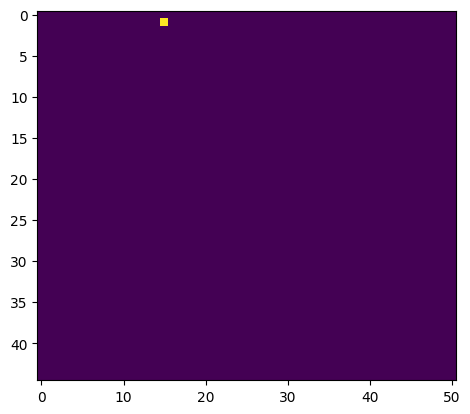

In [9]:
import geopandas as gpd
import rasterio
import rasterio.features
import rasterio.warp
import numpy as np
import matplotlib.pyplot as plt

def read_tif(name):
    """
    Open a satellite images and return bands, latitude and longitude of each pixel.
    """
    with rasterio.open(name) as src:
        dt = src.read()
        height = dt.shape[1]
        width = dt.shape[2]
        cols, rows = np.meshgrid(np.arange(width), np.arange(height))
        xs, ys = rasterio.transform.xy(src.transform, rows, cols)
        lons = np.array(xs)
        lats = np.array(ys)
        src.close()
    return dt, lons, lats


image, _, _ = read_tif('h3.tif')
image = image[0]
plt.imshow(image == 1200)

In [5]:
np.unique(image).shape

(1150,)